                                                     Visualising

In [505]:
import pandas as pd

df = pd.read_csv (r'C:\Users\om\Fakejob\fake_job_postings.csv')


In [427]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [428]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [430]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [431]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence,text
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import nltk
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:>

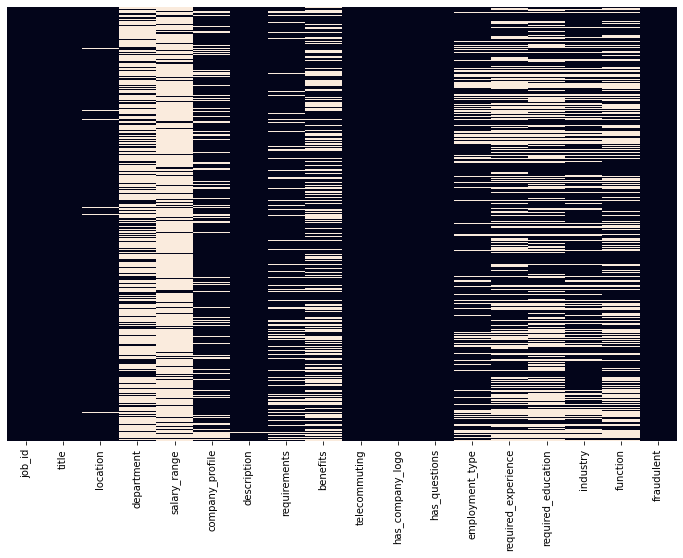

In [432]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [433]:
df.fillna('',inplace=True)

<AxesSubplot:>

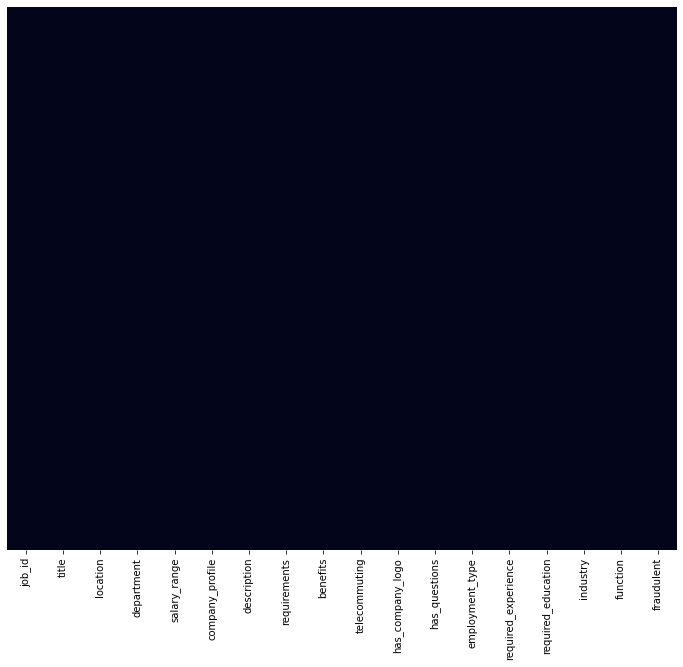

In [434]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

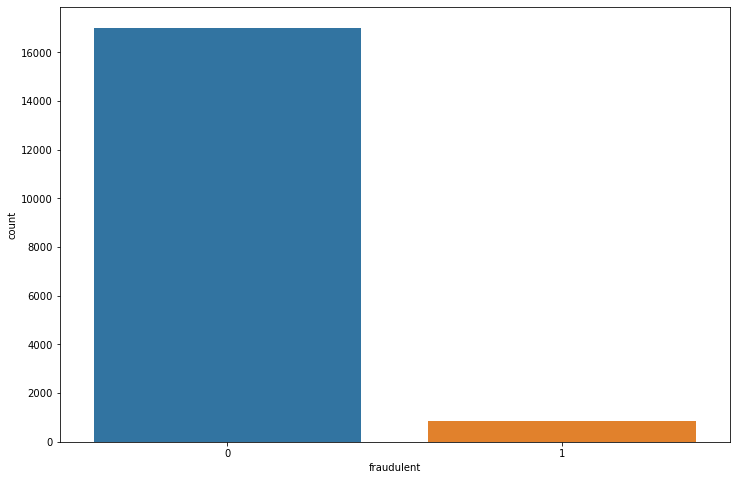

In [435]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca()
sns.countplot(x="fraudulent", data=df,ax=ax)

In [436]:
df['text'] = df['title'].str.cat(df[['location', 'department','salary_range','company_profile','description','requirements',
                                    'benefits','employment_type','required_education','industry',
                                    'function']].astype(str), sep=' ')

In [437]:
df['text'][0]

"Marketing Intern US, NY, New York Marketing  We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food commun

In [438]:
df["text_length"]=df["text"].str.len()

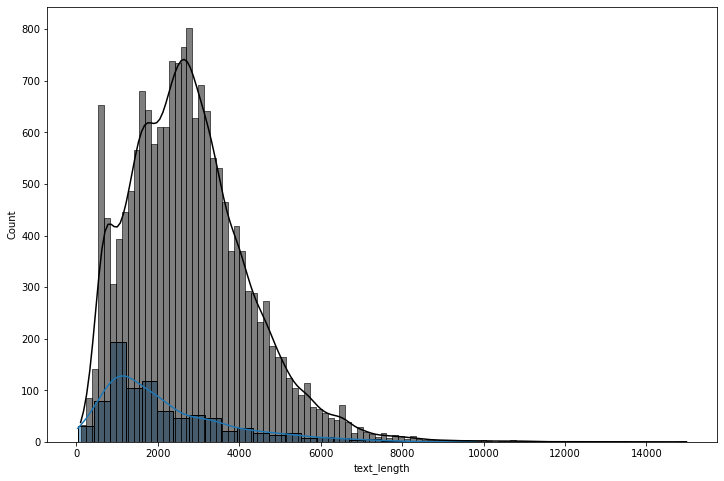

In [439]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca()
sns.histplot(x=df[df["fraudulent"]==1]["text_length"],kde=True,ax=ax)
sns.histplot(x=df[df["fraudulent"]==0]["text_length"],kde=True,color="black",ax=ax);

<BarContainer object of 10 artists>

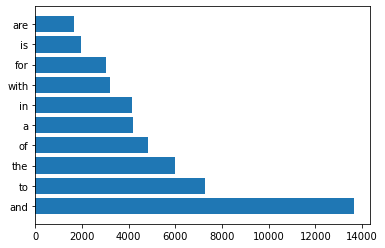

In [440]:
pos_={}
for text in df[df["fraudulent"]==1]["text"]:
    text=text.split()
    for word in text:
        if word in pos_:
            pos_[word]+=1
        else:
            pos_[word]=1
        
pos=pd.DataFrame(sorted(pos_.items(),key=lambda x: x[1],reverse=True))
plt.barh(pos[0][:10],pos[1][:10])

In [441]:
df.text = df.text.apply(lambda x: x.lower())

In [445]:
nltk.download('stopwords')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\om\AppData\Local\Temp/ipykernel_20216/3137147613.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")


<BarContainer object of 10 artists>

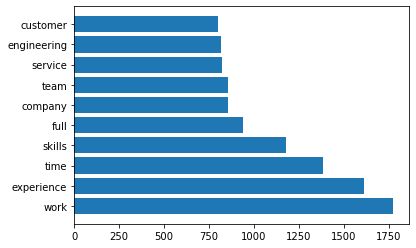

In [446]:
pos_={}
for text in df[df["fraudulent"]==1]["text"]:
    text=text.split()
    for word in text:
        if word in pos_:
            pos_[word]+=1
        else:
            pos_[word]=1
        
pos=pd.DataFrame(sorted(pos_.items(),key=lambda x: x[1],reverse=True))
plt.barh(pos[0][:10],pos[1][:10])

<BarContainer object of 10 artists>

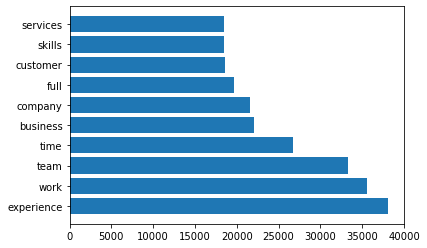

In [447]:
pos_r={}
for text in df[df["fraudulent"]==0]["text"]:
    text=text.split()
    for word in text:
        if word in pos_r:
            pos_r[word]+=1
        else:
            pos_r[word]=1
        
posr=pd.DataFrame(sorted(pos_r.items(),key=lambda x: x[1],reverse=True))
plt.barh(posr[0][:10],posr[1][:10])

                                                    Pre-Processing

In [448]:
df[df.text.duplicated()].count()

job_id                 549
title                  549
location               549
department             549
salary_range           549
company_profile        549
description            549
requirements           549
benefits               549
telecommuting          549
has_company_logo       549
has_questions          549
employment_type        549
required_experience    549
required_education     549
industry               549
function               549
fraudulent             549
text                   549
text_length            549
dtype: int64

In [449]:
df = df.drop_duplicates(keep='first')
print(len(df))
df.reset_index(drop=True, inplace=True)

17880


In [450]:
num_max = 1000000
max_len = 400
token = Tokenizer(num_words=num_max)
token.fit_on_texts(df.text)
vocab_size=len(token.word_index)

In [451]:
text_seq = token.texts_to_sequences(df.text)

In [452]:
text_mat = sequence.pad_sequences(text_seq,maxlen=max_len,padding='post')
X=MinMaxScaler().fit_transform(text_mat)
X

array([[1.61246977e-04, 1.27198188e-02, 3.53398642e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.59043268e-02, 2.03905491e-03, 1.07416001e-04, ...,
        3.05914774e-03, 9.69117457e-05, 3.80600261e-04],
       [4.78473529e-02, 2.71873989e-02, 5.22041763e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.26740124e-04, 3.22580645e-03, 3.59843602e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21365224e-02, 5.43747977e-03, 2.03832603e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.14995969e-05, 4.89804725e-03, 3.42657042e-03, ...,
        1.33995727e-03, 2.58431322e-04, 1.60395824e-03]])

                                                 Splitting

In [453]:
x = df['text']
y = df['fraudulent']

#split it into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

#vectorization
MAX = 2000
vectorizer = TfidfVectorizer(max_features = MAX)
vectorizer.fit(X_train)

x_trainvec = vectorizer.transform(X_train)
x_testvec = vectorizer.transform(X_test)

In [454]:
X_traina,X_testa,y_traina,y_testa=train_test_split(X,df.fraudulent,test_size=0.20, random_state=122)

                                                    KNN

In [501]:
neighbors = list(range(1,15,2))
scores_ = {}
mean_score={}

for item in neighbors:
    knn = KNeighborsClassifier(n_neighbors=item)
    knn.fit(x_trainvec, y_train)
    pred_knn = knn.predict(x_testvec)
    scores = accuracy_score(pred_knn,y_test)
    scores_[item]=scores

    
# for key, value in scores_.items():
#     ms=np.mean(list(scores_[key]))
#     mean_score[key]=ms
# mean_score

In [502]:
scores_

{1: 0.9815436241610739,
 3: 0.9804250559284117,
 5: 0.9793064876957495,
 7: 0.9807046979865772,
 9: 0.9798657718120806,
 11: 0.9781879194630873,
 13: 0.9751118568232662}

In [457]:
max_key = max(scores_, key=scores_.get) 
max_key
knn_best_accuracy=scores_[max_key]
knn_best_accuracy

0.9815436241610739

In [459]:
max_key = max(scores_, key=scores_.get) 
max_key
knn_best_accuracy=scores_[max_key]

<Figure size 432x288 with 0 Axes>

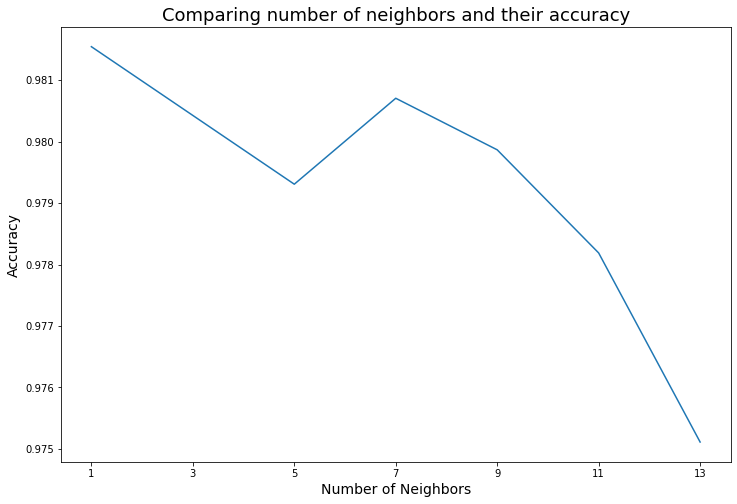

In [460]:
plt.figure()
plt.figure(figsize=(12,8))
plt.title('Comparing number of neighbors and their accuracy', fontsize=18)
plt.xlabel('Number of Neighbors', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(np.arange(1,15,2), np.arange(1,15,2))
plt.plot(neighbors, scores_.values())
plt.show()

In [503]:
print("Classification Report of KNN:\n", metrics.classification_report(y_test, pred_knn), "\n")

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3395
           1       0.86      0.61      0.71       181

    accuracy                           0.98      3576
   macro avg       0.92      0.80      0.85      3576
weighted avg       0.97      0.98      0.97      3576
 



                                                      ANN

In [463]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 15, input_length=400),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
ab=model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

num_epochs = 5

model1_train = model1.fit(X_traina, y_traina, epochs=num_epochs, verbose=2)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 400, 15)           1397730   
                                                                 
 dropout_25 (Dropout)        (None, 400, 15)           0         
                                                                 
 conv1d_25 (Conv1D)          (None, 396, 64)           4864      
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 99, 64)           0         
 g1D)                                                            
                                                                 
 bidirectional_25 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dense_25 (Dense)            (None, 1)               

In [464]:
model1_acc=model1.evaluate(X_testa, y_testa)

112/112 [==============================] - 6s 45ms/step - loss: 0.1890 - accuracy: 0.9533


In [465]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 15, input_length=400),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

num_epochs = 10
model2_train = model2.fit(X_traina, y_traina, epochs=num_epochs, verbose=2,validation_split=0.1, batch_size=30, shuffle=True)


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 400, 15)           1397730   
                                                                 
 dropout_26 (Dropout)        (None, 400, 15)           0         
                                                                 
 conv1d_26 (Conv1D)          (None, 396, 64)           4864      
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 99, 64)           0         
 g1D)                                                            
                                                                 
 bidirectional_26 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dense_26 (Dense)            (None, 1)               

In [466]:
model2_acc=model2.evaluate(X_testa, y_testa)

112/112 [==============================] - 5s 44ms/step - loss: 0.1901 - accuracy: 0.9533


In [467]:
model2_train.history

{'loss': [0.20615504682064056,
  0.19532914459705353,
  0.19522491097450256,
  0.19519762694835663,
  0.19506904482841492,
  0.19508537650108337,
  0.19508016109466553,
  0.19485661387443542,
  0.19486838579177856,
  0.19456039369106293],
 'accuracy': [0.9491959810256958,
  0.9513710737228394,
  0.9513710737228394,
  0.9513710737228394,
  0.9513710737228394,
  0.9513710737228394,
  0.9513710737228394,
  0.9513710737228394,
  0.9513710737228394,
  0.9513710737228394],
 'val_loss': [0.20197276771068573,
  0.2041216939687729,
  0.20200152695178986,
  0.2026255875825882,
  0.20448017120361328,
  0.20148783922195435,
  0.20178209245204926,
  0.20150616765022278,
  0.2023448348045349,
  0.20168186724185944],
 'val_accuracy': [0.9489867091178894,
  0.9489867091178894,
  0.9489867091178894,
  0.9489867091178894,
  0.9489867091178894,
  0.9489867091178894,
  0.9489867091178894,
  0.9489867091178894,
  0.9489867091178894,
  0.9489867091178894]}

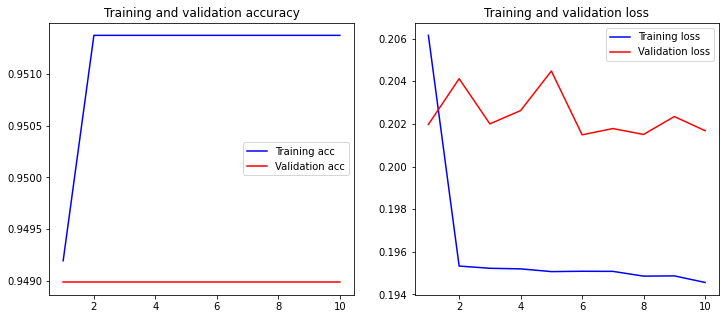

In [468]:
acc = model2_train.history['accuracy']
val_acc = model2_train.history['val_accuracy']
loss = model2_train.history['loss']
val_loss = model2_train.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

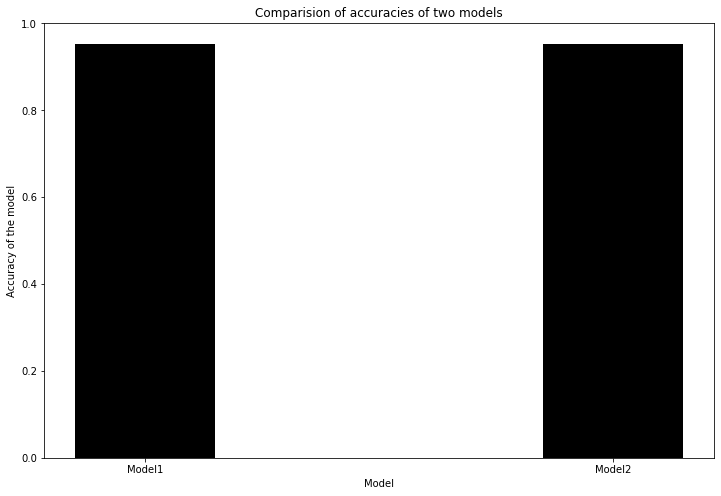

In [469]:
data = {'Model1':model1_acc[1],'Model2':model2_acc[1]}
courses = list(data.keys())
values = list(data.values())  
fig = plt.figure(figsize = (12, 8))
plt.bar(courses, values, color ='black',
        width = 0.3)
 
plt.xlabel("Model")
plt.ylabel("Accuracy of the model")
plt.title("Comparision of accuracies of two models")
plt.show()

In [470]:
ann_best_acc=max(model1_acc[1],model2_acc[1])
ann_best_acc

0.9532997608184814

                                                 Naive-Bayes

In [471]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score

In [497]:
alpha_set=['0.0001','0.001','0.01','0.1','1','10','100','1000']
acc={}
for i in alpha_set:
    model_n=MultinomialNB(alpha=int(float(i)))
    model_n.fit(x_trainvec, y_train)
    model_n_pred =  model_n.predict(x_testvec)
    acc[i] = accuracy_score(y_test, model_n_pred)

C:\Users\om\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\om\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\om\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\om\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [491]:
acc

{'0.0001': 0.9686800894854586,
 '0.001': 0.9686800894854586,
 '0.01': 0.9686800894854586,
 '0.1': 0.9686800894854586,
 '1': 0.9602908277404921,
 '10': 0.9493847874720358,
 '100': 0.9493847874720358,
 '1000': 0.9493847874720358}

In [498]:
max_key = max(acc, key=acc.get) 
max_key
nb_best_accuracy=acc[max_key]
nb_best_accuracy
model_n=MultinomialNB(alpha=int(float(max_key)))
model_n.fit(x_trainvec, y_train)
model_n_pred =  model_n.predict(x_testvec)
acc[i] = accuracy_score(y_test, model_n_pred)

C:\Users\om\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [499]:
from sklearn import metrics
print(metrics.classification_report(y_test, model_n_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.95      0.40      0.57       181

    accuracy                           0.97      3576
   macro avg       0.96      0.70      0.77      3576
weighted avg       0.97      0.97      0.96      3576



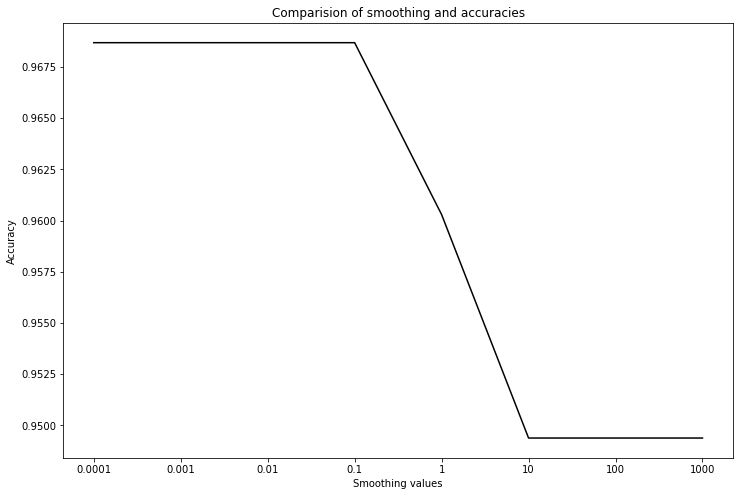

In [492]:
courses = list(acc.keys())
values = list(acc.values())  
fig = plt.figure(figsize = (12, 8))
plt.plot(courses, values, color ='black')
plt.xlabel("Smoothing values")
plt.ylabel("Accuracy")
plt.title("Comparision of smoothing and accuracies")
plt.show()

                                                 Random Forest

In [481]:
model_r=RandomForestClassifier()
model_r.fit(x_trainvec,y_train)
pred_r=model_r.predict(x_testvec)
score_r=accuracy_score(y_test,pred_r)
score_r

0.9779082774049217

In [482]:
print(metrics.classification_report(y_test, pred_r))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.56      0.72       181

    accuracy                           0.98      3576
   macro avg       0.99      0.78      0.85      3576
weighted avg       0.98      0.98      0.97      3576



                                                    SVM

In [483]:
svc = SVC(kernel = 'rbf')
svc.fit(x_trainvec, y_train)
pred_svc = svc.predict(x_testvec)
print("Accuracy Score of SVC :", accuracy_score(pred_svc, y_test)) 

Accuracy Score of SVC : 0.9807046979865772


In [484]:
print("Classification Report of SVC:\n", metrics.classification_report(y_test, pred_svc,zero_division=1), "\n")

Classification Report of SVC:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.62      0.76       181

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576
 



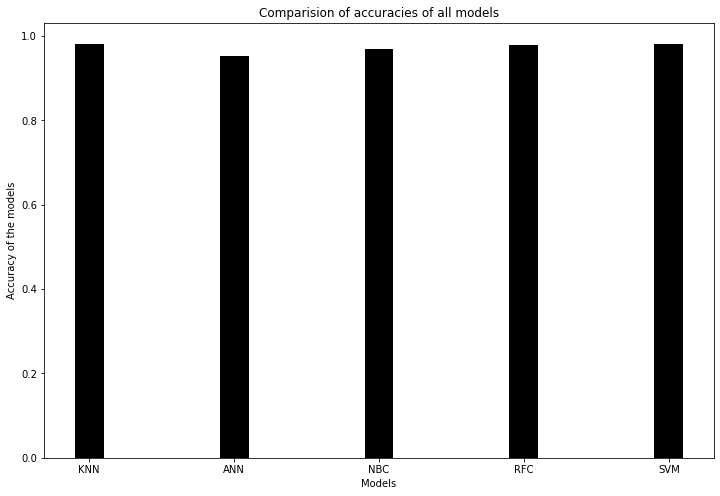

In [508]:
data = {'KNN':knn_best_accuracy,'ANN':ann_best_acc,'NBC':nb_best_accuracy,'RFC':score_r,'SVM':accuracy_score(pred_svc, y_test)}
courses = list(data.keys())
values = list(data.values())  
fig = plt.figure(figsize = (12, 8))
plt.bar(courses, values, color ='black',
        width = 0.2)
plt.xlabel("Models")
plt.ylabel("Accuracy of the models")
plt.title("Comparision of accuracies of all models")
plt.show()

In [500]:
print("Classification Report of KNN:\n", metrics.classification_report(y_test, pred_knn), "\n")
print("Classification Report of NB:\n",metrics.classification_report(y_test, model_n_pred),"\n")
print("Classification Report of RFC:\n",metrics.classification_report(y_test, pred_r),"\n")
print("Classification Report of SVC:\n", metrics.classification_report(y_test, pred_svc,zero_division=1), "\n")

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3395
           1       0.88      0.71      0.79       181

    accuracy                           0.98      3576
   macro avg       0.93      0.85      0.89      3576
weighted avg       0.98      0.98      0.98      3576
 

Classification Report of NB:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.95      0.40      0.57       181

    accuracy                           0.97      3576
   macro avg       0.96      0.70      0.77      3576
weighted avg       0.97      0.97      0.96      3576
 

Classification Report of RFC:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.56      0.72       181

    accuracy                           0.98      3576
   macro avg       0.99      0.7